# Importing Packages

In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Data preparation

## Loading dataset

In [90]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## Reshaping the data

In [91]:
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0
X_test = X_test.reshape(-1,28,28,1).astype('float32')/255.0

## One-hot encoding the target labels

In [92]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## Data Augmentation to generate more samples

In [93]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1
)
datagen.fit(X_train)

# Building a CNN Model with Batch normalization and dropout

In [98]:
model = Sequential([
    Conv2D(32, kernel_size =(3,3), activation = 'relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(32, kernel_size =(3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(32, kernel_size =(3,3), activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation ='softmax'),
])   

## Compiling the model

In [99]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics=['accuracy'])

## Set up early stopping and learning rate reduction on plateau

In [96]:
early_stopping = EarlyStopping(monitor ='val_loss', patience = 5, restore_best_weights = True)
lr_reduction = ReduceLROnPlateau(monitor ='val_loss', factor = 0.5, patience = 3, min_lr =1e-5)

# Training the Model with data augmentation

In [101]:
history = model.fit(
    datagen.flow(X_train,y_train, batch_size =450),
    epochs =15,
    validation_data =(X_test, y_test),
    callbacks = [early_stopping, lr_reduction]
)

Epoch 1/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 181ms/step - accuracy: 0.7798 - loss: 0.6127 - val_accuracy: 0.8309 - val_loss: 0.4632 - learning_rate: 0.0010
Epoch 2/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 171ms/step - accuracy: 0.7842 - loss: 0.5965 - val_accuracy: 0.8345 - val_loss: 0.4549 - learning_rate: 0.0010
Epoch 3/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 26s 192ms/step - accuracy: 0.7904 - loss: 0.5824 - val_accuracy: 0.8290 - val_loss: 0.4646 - learning_rate: 0.0010
Epoch 4/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 24s 176ms/step - accuracy: 0.7914 - loss: 0.5876 - val_accuracy: 0.8213 - val_loss: 0.4762 - learning_rate: 0.0010
Epoch 5/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 25s 189ms/step - accuracy: 0.7908 - loss: 0.5870 - val_accuracy: 0.8315 - val_loss: 0.4613 - learning_rate: 0.0010
Epoch 6/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - accuracy: 0.7908 - loss: 0.5891 - val_accuracy: 0.8365 - val_loss: 0.4552 - learning_rate: 5.0000e-04
Epoch 7/15
134/134 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step - accuracy:

# Evaluating the Model

In [102]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_test_classes = np.argmax(y_test, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


## Printing the accuracy and classification report

In [103]:
accuracy = accuracy_score(y_test_classes, y_pred)
print("Model Accuracy: ",accuracy)
print("\nClassification Report:\n" , classification_report(y_test_classes,y_pred))

Model Accuracy:  0.8345

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.80      0.77      1000
           3       0.84      0.83      0.84      1000
           4       0.68      0.79      0.73      1000
           5       0.92      0.97      0.95      1000
           6       0.56      0.32      0.41      1000
           7       0.94      0.91      0.92      1000
           8       0.94      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



## Plot Training History 

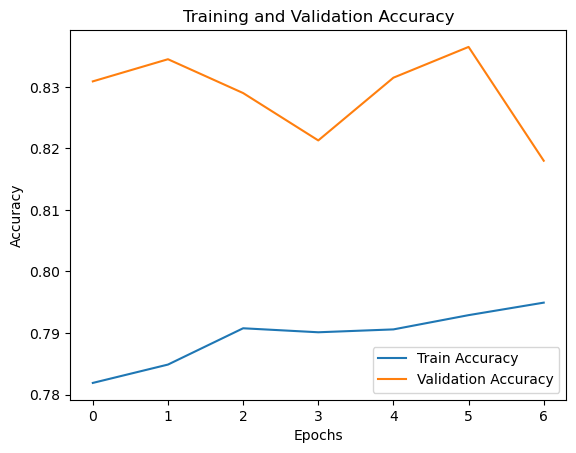

In [104]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label ='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()